**Aishwarya Velumani**

**DS Assignment**

# Importing the datasets and the necessary libraries

In [387]:
!pip install fastparquet

In [388]:
# from fastparquet import ParquetFile
# from google.colab import files

# uploaded= files.upload() #importing the training dataset

In [389]:
# uploaded1= files.upload() #importing the test dataset

In [390]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [391]:
#importing necessary libraries
import numpy as np
import pandas as pd
import itertools
import pyarrow.parquet as pq
import pyarrow as pa

In [392]:
train_ds= pq.read_table('drive/My Drive/akaike new/Structured_Data_Assignment/train.parquet')

In [393]:
test_ds= pq.read_table('drive/My Drive/akaike new/Structured_Data_Assignment/test.parquet')

In [394]:
type(train_ds)

pyarrow.lib.Table

In [395]:
train_pd= train_ds.to_pandas()

In [396]:
test_pd= test_ds.to_pandas()

In [397]:
train_pd.head(10)

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
9,a0dc9577-1c7c-11ec-8b4d-16262ee38c7f,2019-12-16,DRUG_TYPE_1
11,a0dc95c6-1c7c-11ec-8e77-16262ee38c7f,2020-02-07,DRUG_TYPE_1
12,a0dc95f9-1c7c-11ec-b968-16262ee38c7f,2019-08-01,DRUG_TYPE_1
14,a0dc962a-1c7c-11ec-8a51-16262ee38c7f,2017-06-20,DRUG_TYPE_1
16,a0dc9659-1c7c-11ec-a91e-16262ee38c7f,2015-11-25,DRUG_TYPE_2


In [398]:
test_pd.head(10)

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0
6,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-05-09,PRIMARY_DIAGNOSIS
7,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-07-07,DRUG_TYPE_8
8,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,TEST_TYPE_0
9,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2019-05-21,DRUG_TYPE_0
10,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-06-23,DRUG_TYPE_7


In [399]:
type(train_pd)

pandas.core.frame.DataFrame

In [400]:
train_pd.loc[train_pd['Incident'] == 'TARGET DRUG']

,Patient-Uid,Date,Incident
3294791,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG
3296990,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG
3305387,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG
3309423,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG
3309494,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG
...,...,...,...
29074998,a0ef2b6d-1c7c-11ec-9172-16262ee38c7f,2018-10-12,TARGET DRUG
29075105,a0ebe423-1c7c-11ec-a5e0-16262ee38c7f,2019-07-02,TARGET DRUG
29075494,a0ebc713-1c7c-11ec-bd53-16262ee38c7f,2019-05-21,TARGET DRUG
29080031,a0ee1bdb-1c7c-11ec-90ba-16262ee38c7f,2018-06-07,TARGET DRUG


# Preprocessing

In [401]:
train_pd.dtypes

Patient-Uid            object
Date           datetime64[ns]
Incident               object
dtype: object

In [402]:
train_pd.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [403]:
test_pd.head()

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0


In [404]:
test_pd.dtypes

Patient-Uid            object
Date           datetime64[ns]
Incident               object
dtype: object

In [405]:
one_hot_incident= pd.get_dummies(train_pd['Incident'], drop_first= True)   #one hot encoding
train_pd= pd.concat([train_pd,one_hot_incident],axis=1)

In [406]:
train_pd.head()

,Patient-Uid,Date,Incident,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,DRUG_TYPE_18,DRUG_TYPE_2,DRUG_TYPE_3,DRUG_TYPE_4,DRUG_TYPE_5,DRUG_TYPE_6,DRUG_TYPE_7,DRUG_TYPE_8,DRUG_TYPE_9,PRIMARY_DIAGNOSIS,SYMPTOM_TYPE_0,SYMPTOM_TYPE_1,SYMPTOM_TYPE_10,SYMPTOM_TYPE_11,SYMPTOM_TYPE_12,SYMPTOM_TYPE_13,SYMPTOM_TYPE_14,SYMPTOM_TYPE_15,SYMPTOM_TYPE_16,SYMPTOM_TYPE_17,SYMPTOM_TYPE_18,SYMPTOM_TYPE_19,SYMPTOM_TYPE_2,SYMPTOM_TYPE_20,SYMPTOM_TYPE_21,SYMPTOM_TYPE_22,SYMPTOM_TYPE_23,SYMPTOM_TYPE_24,SYMPTOM_TYPE_25,SYMPTOM_TYPE_26,SYMPTOM_TYPE_27,SYMPTOM_TYPE_28,SYMPTOM_TYPE_29,SYMPTOM_TYPE_3,SYMPTOM_TYPE_4,SYMPTOM_TYPE_5,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [407]:
train_pd.drop(labels=['Incident'],axis=1,inplace=True)

In [408]:
train_pd.columns

Index(['Patient-Uid', 'Date', 'DRUG_TYPE_1', 'DRUG_TYPE_10', 'DRUG_TYPE_11',
       'DRUG_TYPE_12', 'DRUG_TYPE_13', 'DRUG_TYPE_14', 'DRUG_TYPE_15',
       'DRUG_TYPE_16', 'DRUG_TYPE_17', 'DRUG_TYPE_18', 'DRUG_TYPE_2',
       'DRUG_TYPE_3', 'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6',
       'DRUG_TYPE_7', 'DRUG_TYPE_8', 'DRUG_TYPE_9', 'PRIMARY_DIAGNOSIS',
       'SYMPTOM_TYPE_0', 'SYMPTOM_TYPE_1', 'SYMPTOM_TYPE_10',
       'SYMPTOM_TYPE_11', 'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_13',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_16',
       'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_18', 'SYMPTOM_TYPE_19',
       'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
       'SYMPTOM_TYPE_22', 'SYMPTOM_TYPE_23', 'SYMPTOM_TYPE_24',
       'SYMPTOM_TYPE_25', 'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_27',
       'SYMPTOM_TYPE_28', 'SYMPTOM_TYPE_29', 'SYMPTOM_TYPE_3',
       'SYMPTOM_TYPE_4', 'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_6', 'SYMPTOM_TYPE_7',
       'SYMPTOM_TYPE_8', 'SYMPTOM_TYPE_9', 'TARGET DRUG

In [409]:
test_one_hot_incident= pd.get_dummies(test_pd['Incident'], drop_first= True)
test_pd= pd.concat([test_pd,test_one_hot_incident],axis=1)

In [410]:
test_pd.drop(labels=['Incident'],axis=1,inplace=True)

In [411]:
test_pd.head()

,Patient-Uid,Date,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,DRUG_TYPE_2,DRUG_TYPE_3,DRUG_TYPE_4,DRUG_TYPE_5,DRUG_TYPE_6,DRUG_TYPE_7,DRUG_TYPE_8,DRUG_TYPE_9,PRIMARY_DIAGNOSIS,SYMPTOM_TYPE_0,SYMPTOM_TYPE_1,SYMPTOM_TYPE_10,SYMPTOM_TYPE_11,SYMPTOM_TYPE_12,SYMPTOM_TYPE_13,SYMPTOM_TYPE_14,SYMPTOM_TYPE_15,SYMPTOM_TYPE_16,SYMPTOM_TYPE_17,SYMPTOM_TYPE_18,SYMPTOM_TYPE_19,SYMPTOM_TYPE_2,SYMPTOM_TYPE_20,SYMPTOM_TYPE_21,SYMPTOM_TYPE_22,SYMPTOM_TYPE_23,SYMPTOM_TYPE_24,SYMPTOM_TYPE_25,SYMPTOM_TYPE_26,SYMPTOM_TYPE_27,SYMPTOM_TYPE_28,SYMPTOM_TYPE_29,SYMPTOM_TYPE_3,SYMPTOM_TYPE_4,SYMPTOM_TYPE_5,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [412]:
test_pd.dtypes

Patient-Uid                  object
Date                 datetime64[ns]
DRUG_TYPE_1                   uint8
DRUG_TYPE_10                  uint8
DRUG_TYPE_11                  uint8
DRUG_TYPE_12                  uint8
DRUG_TYPE_13                  uint8
DRUG_TYPE_14                  uint8
DRUG_TYPE_15                  uint8
DRUG_TYPE_16                  uint8
DRUG_TYPE_17                  uint8
DRUG_TYPE_2                   uint8
DRUG_TYPE_3                   uint8
DRUG_TYPE_4                   uint8
DRUG_TYPE_5                   uint8
DRUG_TYPE_6                   uint8
DRUG_TYPE_7                   uint8
DRUG_TYPE_8                   uint8
DRUG_TYPE_9                   uint8
PRIMARY_DIAGNOSIS             uint8
SYMPTOM_TYPE_0                uint8
SYMPTOM_TYPE_1                uint8
SYMPTOM_TYPE_10               uint8
SYMPTOM_TYPE_11               uint8
SYMPTOM_TYPE_12               uint8
SYMPTOM_TYPE_13               uint8
SYMPTOM_TYPE_14               uint8
SYMPTOM_TYPE_15             

In [413]:
test_pd['DRUG_TYPE_18']=0           #adding column to match shape of train_pd

In [414]:
train_pd.dtypes

Patient-Uid                  object
Date                 datetime64[ns]
DRUG_TYPE_1                   uint8
DRUG_TYPE_10                  uint8
DRUG_TYPE_11                  uint8
DRUG_TYPE_12                  uint8
DRUG_TYPE_13                  uint8
DRUG_TYPE_14                  uint8
DRUG_TYPE_15                  uint8
DRUG_TYPE_16                  uint8
DRUG_TYPE_17                  uint8
DRUG_TYPE_18                  uint8
DRUG_TYPE_2                   uint8
DRUG_TYPE_3                   uint8
DRUG_TYPE_4                   uint8
DRUG_TYPE_5                   uint8
DRUG_TYPE_6                   uint8
DRUG_TYPE_7                   uint8
DRUG_TYPE_8                   uint8
DRUG_TYPE_9                   uint8
PRIMARY_DIAGNOSIS             uint8
SYMPTOM_TYPE_0                uint8
SYMPTOM_TYPE_1                uint8
SYMPTOM_TYPE_10               uint8
SYMPTOM_TYPE_11               uint8
SYMPTOM_TYPE_12               uint8
SYMPTOM_TYPE_13               uint8
SYMPTOM_TYPE_14             

In [415]:
aggregation_functions = {'Patient-Uid': 'first', 'Date': 'max',
                         'DRUG_TYPE_1': 'sum', 'DRUG_TYPE_2': 'sum', 'DRUG_TYPE_3': 'sum',
                         'DRUG_TYPE_4': 'sum','DRUG_TYPE_5': 'sum','DRUG_TYPE_6': 'sum','DRUG_TYPE_7': 'sum','DRUG_TYPE_8': 'sum',
                         'DRUG_TYPE_9': 'sum','DRUG_TYPE_10': 'sum','DRUG_TYPE_11': 'sum','DRUG_TYPE_12': 'sum','DRUG_TYPE_13': 'sum',
                         'DRUG_TYPE_14': 'sum','DRUG_TYPE_15': 'sum','DRUG_TYPE_16': 'sum','DRUG_TYPE_17': 'sum','DRUG_TYPE_18': 'sum',
                         'PRIMARY_DIAGNOSIS' : 'sum',
                         'SYMPTOM_TYPE_0':'sum', 'SYMPTOM_TYPE_1':'sum','SYMPTOM_TYPE_2':'sum','SYMPTOM_TYPE_3':'sum','SYMPTOM_TYPE_4':'sum',
                         'SYMPTOM_TYPE_5':'sum','SYMPTOM_TYPE_6':'sum','SYMPTOM_TYPE_7':'sum','SYMPTOM_TYPE_8':'sum','SYMPTOM_TYPE_9':'sum',
                         'SYMPTOM_TYPE_10':'sum','SYMPTOM_TYPE_11':'sum','SYMPTOM_TYPE_12':'sum','SYMPTOM_TYPE_13':'sum','SYMPTOM_TYPE_14':'sum',
                         'SYMPTOM_TYPE_15':'sum','SYMPTOM_TYPE_16':'sum','SYMPTOM_TYPE_17':'sum','SYMPTOM_TYPE_18':'sum','SYMPTOM_TYPE_19':'sum',
                         'SYMPTOM_TYPE_20':'sum','SYMPTOM_TYPE_21':'sum','SYMPTOM_TYPE_22':'sum','SYMPTOM_TYPE_23':'sum','SYMPTOM_TYPE_24':'sum',
                         'SYMPTOM_TYPE_25':'sum','SYMPTOM_TYPE_26':'sum','SYMPTOM_TYPE_27':'sum','SYMPTOM_TYPE_28':'sum','SYMPTOM_TYPE_29':'sum',
                         'TARGET DRUG':'sum',
                         'TEST_TYPE_0':'sum','TEST_TYPE_1':'sum','TEST_TYPE_2':'sum','TEST_TYPE_3':'sum','TEST_TYPE_4':'sum','TEST_TYPE_5':'sum',
                          }


In [416]:
aggregation_functions_1 = {'Patient-Uid': 'first', 'Date': 'max',
                         'DRUG_TYPE_1': 'sum', 'DRUG_TYPE_2': 'sum', 'DRUG_TYPE_3': 'sum',
                         'DRUG_TYPE_4': 'sum','DRUG_TYPE_5': 'sum','DRUG_TYPE_6': 'sum','DRUG_TYPE_7': 'sum','DRUG_TYPE_8': 'sum',
                         'DRUG_TYPE_9': 'sum','DRUG_TYPE_10': 'sum','DRUG_TYPE_11': 'sum','DRUG_TYPE_12': 'sum','DRUG_TYPE_13': 'sum',
                         'DRUG_TYPE_14': 'sum','DRUG_TYPE_15': 'sum','DRUG_TYPE_16': 'sum','DRUG_TYPE_17': 'sum','DRUG_TYPE_18': 'sum',
                         'PRIMARY_DIAGNOSIS' : 'sum',
                         'SYMPTOM_TYPE_0':'sum', 'SYMPTOM_TYPE_1':'sum','SYMPTOM_TYPE_2':'sum','SYMPTOM_TYPE_3':'sum','SYMPTOM_TYPE_4':'sum',
                         'SYMPTOM_TYPE_5':'sum','SYMPTOM_TYPE_6':'sum','SYMPTOM_TYPE_7':'sum','SYMPTOM_TYPE_8':'sum','SYMPTOM_TYPE_9':'sum',
                         'SYMPTOM_TYPE_10':'sum','SYMPTOM_TYPE_11':'sum','SYMPTOM_TYPE_12':'sum','SYMPTOM_TYPE_13':'sum','SYMPTOM_TYPE_14':'sum',
                         'SYMPTOM_TYPE_15':'sum','SYMPTOM_TYPE_16':'sum','SYMPTOM_TYPE_17':'sum','SYMPTOM_TYPE_18':'sum','SYMPTOM_TYPE_19':'sum',
                         'SYMPTOM_TYPE_20':'sum','SYMPTOM_TYPE_21':'sum','SYMPTOM_TYPE_22':'sum','SYMPTOM_TYPE_23':'sum','SYMPTOM_TYPE_24':'sum',
                         'SYMPTOM_TYPE_25':'sum','SYMPTOM_TYPE_26':'sum','SYMPTOM_TYPE_27':'sum','SYMPTOM_TYPE_28':'sum','SYMPTOM_TYPE_29':'sum',
                         'TEST_TYPE_0':'sum','TEST_TYPE_1':'sum','TEST_TYPE_2':'sum','TEST_TYPE_3':'sum','TEST_TYPE_4':'sum','TEST_TYPE_5':'sum',
                          }

In [417]:
train_pd_grp= train_pd.groupby(train_pd['Patient-Uid']).aggregate(aggregation_functions) #Grouping the records by Patient-Uid

In [418]:
test_pd_grp= test_pd.groupby(test_pd['Patient-Uid']).aggregate(aggregation_functions_1)

In [419]:
train_pd_grp.shape

(27033, 58)

In [420]:
target_drug_mean= np.mean(train_pd_grp['TARGET DRUG'] )

In [421]:
target_drug_mean

2.4865164798579515

In [422]:
target_drug_data= train_pd_grp['TARGET DRUG'].quantile([0.25,0.5,0.75])

In [423]:
target_drug_data

0.25    0.0
0.50    0.0
0.75    3.0
Name: TARGET DRUG, dtype: float64

In [424]:
train_pd_grp[train_pd_grp['TARGET DRUG']!=0]

,Patient-Uid,Date,DRUG_TYPE_1,DRUG_TYPE_2,DRUG_TYPE_3,DRUG_TYPE_4,DRUG_TYPE_5,DRUG_TYPE_6,DRUG_TYPE_7,DRUG_TYPE_8,DRUG_TYPE_9,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,DRUG_TYPE_18,PRIMARY_DIAGNOSIS,SYMPTOM_TYPE_0,SYMPTOM_TYPE_1,SYMPTOM_TYPE_2,SYMPTOM_TYPE_3,SYMPTOM_TYPE_4,SYMPTOM_TYPE_5,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,SYMPTOM_TYPE_10,SYMPTOM_TYPE_11,SYMPTOM_TYPE_12,SYMPTOM_TYPE_13,SYMPTOM_TYPE_14,SYMPTOM_TYPE_15,SYMPTOM_TYPE_16,SYMPTOM_TYPE_17,SYMPTOM_TYPE_18,SYMPTOM_TYPE_19,SYMPTOM_TYPE_20,SYMPTOM_TYPE_21,SYMPTOM_TYPE_22,SYMPTOM_TYPE_23,SYMPTOM_TYPE_24,SYMPTOM_TYPE_25,SYMPTOM_TYPE_26,SYMPTOM_TYPE_27,SYMPTOM_TYPE_28,SYMPTOM_TYPE_29,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
Patient-Uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a0e9c384-1c7c-11ec-81a0-16262ee38c7f,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,10,10,0,0,1,22,18,2,0,0,10,0,0,0,0,0,0,0,15.0,5,1,0,0.0,0.0,1.0,5,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,1,1,0,0,0
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2020-03-25,21,35,3,0,1,2,23,7,2,10,0,13,0,0,0,0,0,0,126.0,2,3,0,0.0,0.0,1.0,2,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,2,1,0,0,0
a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2020-08-14,20,3,11,0,2,12,3,1,0,0,0,0,0,0,0,0,0,0,9.0,0,0,0,0.0,0.0,1.0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0
a0e9c414-1c7c-11ec-889a-16262ee38c7f,a0e9c414-1c7c-11ec-889a-16262ee38c7f,2020-08-18,2,23,0,0,3,15,33,0,2,0,0,0,0,0,0,0,0,0,28.0,3,0,1,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,10,0,0,0,0
a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2020-09-03,18,14,5,0,3,26,26,1,7,0,6,0,0,0,0,0,0,0,20.0,9,0,0,0.0,0.0,0.0,3,2,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2020-08-30,9,4,0,0,0,14,4,3,16,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,2020-08-10,23,2,2,1,0,12,12,14,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
a0f0d523-1c7c-11ec-89d2-16262ee38c7f,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,48,1,0,0,0,33,3,0,12,0,3,0,0,0,0,0,0,0,1.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0


In [425]:
#Creating a new column that has the total count of other drugs taken
train_pd_grp['not_target_drugs_total']= train_pd_grp['DRUG_TYPE_1']+ train_pd_grp['DRUG_TYPE_2']+ train_pd_grp['DRUG_TYPE_3']+train_pd_grp['DRUG_TYPE_4']+train_pd_grp['DRUG_TYPE_5']+train_pd_grp['DRUG_TYPE_6']+train_pd_grp['DRUG_TYPE_7']+train_pd_grp['DRUG_TYPE_8']+train_pd_grp['DRUG_TYPE_9']+train_pd_grp['DRUG_TYPE_10']+train_pd_grp['DRUG_TYPE_11']+train_pd_grp['DRUG_TYPE_12']+train_pd_grp['DRUG_TYPE_13']+train_pd_grp['DRUG_TYPE_14']+train_pd_grp['DRUG_TYPE_15']+ train_pd_grp['DRUG_TYPE_16']+train_pd_grp['DRUG_TYPE_17']+train_pd_grp['DRUG_TYPE_18']

In [426]:
test_pd['not_target_drugs_total']= test_pd['DRUG_TYPE_1']+ test_pd['DRUG_TYPE_2']+test_pd['DRUG_TYPE_3']+test_pd['DRUG_TYPE_4']+test_pd['DRUG_TYPE_5']+test_pd['DRUG_TYPE_6']+test_pd['DRUG_TYPE_7']+test_pd['DRUG_TYPE_8']+test_pd['DRUG_TYPE_9']+test_pd['DRUG_TYPE_10']+test_pd['DRUG_TYPE_11']+test_pd['DRUG_TYPE_12']+test_pd['DRUG_TYPE_13']+test_pd['DRUG_TYPE_14']+test_pd['DRUG_TYPE_15']+ test_pd['DRUG_TYPE_16']+test_pd['DRUG_TYPE_17']+test_pd['DRUG_TYPE_18']

In [427]:
test_pd_grp['not_target_drugs_total']= test_pd_grp['DRUG_TYPE_1']+ test_pd_grp['DRUG_TYPE_2']+test_pd_grp['DRUG_TYPE_3']+test_pd_grp['DRUG_TYPE_4']+test_pd_grp['DRUG_TYPE_5']+test_pd_grp['DRUG_TYPE_6']+test_pd_grp['DRUG_TYPE_7']+test_pd_grp['DRUG_TYPE_8']+test_pd_grp['DRUG_TYPE_9']+test_pd_grp['DRUG_TYPE_10']+test_pd_grp['DRUG_TYPE_11']+test_pd_grp['DRUG_TYPE_12']+test_pd_grp['DRUG_TYPE_13']+test_pd_grp['DRUG_TYPE_14']+test_pd_grp['DRUG_TYPE_15']+ test_pd_grp['DRUG_TYPE_16']+test_pd_grp['DRUG_TYPE_17']+test_pd_grp['DRUG_TYPE_18']

In [428]:
train_pd_grp

,Patient-Uid,Date,DRUG_TYPE_1,DRUG_TYPE_2,DRUG_TYPE_3,DRUG_TYPE_4,DRUG_TYPE_5,DRUG_TYPE_6,DRUG_TYPE_7,DRUG_TYPE_8,DRUG_TYPE_9,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,DRUG_TYPE_18,PRIMARY_DIAGNOSIS,SYMPTOM_TYPE_0,SYMPTOM_TYPE_1,SYMPTOM_TYPE_2,SYMPTOM_TYPE_3,SYMPTOM_TYPE_4,SYMPTOM_TYPE_5,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,SYMPTOM_TYPE_10,SYMPTOM_TYPE_11,SYMPTOM_TYPE_12,SYMPTOM_TYPE_13,SYMPTOM_TYPE_14,SYMPTOM_TYPE_15,SYMPTOM_TYPE_16,SYMPTOM_TYPE_17,SYMPTOM_TYPE_18,SYMPTOM_TYPE_19,SYMPTOM_TYPE_20,SYMPTOM_TYPE_21,SYMPTOM_TYPE_22,SYMPTOM_TYPE_23,SYMPTOM_TYPE_24,SYMPTOM_TYPE_25,SYMPTOM_TYPE_26,SYMPTOM_TYPE_27,SYMPTOM_TYPE_28,SYMPTOM_TYPE_29,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,not_target_drugs_total
Patient-Uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a0db1e73-1c7c-11ec-ae39-16262ee38c7f,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-09,0,11,0,0,0,10,6,2,1,0,1,0,0,0,0,0,0,0,16.0,5,0,2,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,2,0,0,0,0,31
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2020-03-29,27,13,7,0,0,6,5,27,0,0,0,0,0,0,0,0,0,0,7.0,1,0,0,0.0,0.0,0.0,2,0,0,0,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,85
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2019-04-05,7,8,0,0,0,0,19,3,0,0,10,0,0,0,0,0,0,0,29.0,1,0,0,2.0,0.0,0.0,8,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,47
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2020-07-10,42,6,0,0,0,0,6,28,0,0,0,0,0,0,0,0,0,0,11.0,0,0,0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82
a0dc9543-1c7c-11ec-bb63-16262ee38c7f,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2020-08-12,45,24,6,0,0,8,37,0,0,0,24,0,0,0,0,0,0,0,29.0,10,0,0,0.0,0.0,0.0,6,5,6,0,1,0,0,0,0.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,27,1,0,0,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2020-08-30,9,4,0,0,0,14,4,3,16,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,50
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,2020-08-10,23,2,2,1,0,12,12,14,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,66
a0f0d523-1c7c-11ec-89d2-16262ee38c7f,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,48,1,0,0,0,33,3,0,12,0,3,0,0,0,0,0,0,0,1.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,100


In [429]:
train_pd_grp_1= train_pd_grp.drop(['DRUG_TYPE_1',	'DRUG_TYPE_2',	'DRUG_TYPE_3'	,'DRUG_TYPE_4'	,'DRUG_TYPE_5',	'DRUG_TYPE_6',	'DRUG_TYPE_7'	,'DRUG_TYPE_8',	'DRUG_TYPE_9',	'DRUG_TYPE_10',	'DRUG_TYPE_11'	,'DRUG_TYPE_12',	'DRUG_TYPE_13',	'DRUG_TYPE_14',	'DRUG_TYPE_15',	'DRUG_TYPE_16',	'DRUG_TYPE_17',	'DRUG_TYPE_18'], axis=1)

In [430]:
test_pd= test_pd.drop(['DRUG_TYPE_1',	'DRUG_TYPE_2',	'DRUG_TYPE_3'	,'DRUG_TYPE_4'	,'DRUG_TYPE_5',	'DRUG_TYPE_6',	'DRUG_TYPE_7'	,'DRUG_TYPE_8',	'DRUG_TYPE_9',	'DRUG_TYPE_10',	'DRUG_TYPE_11'	,'DRUG_TYPE_12',	'DRUG_TYPE_13',	'DRUG_TYPE_14',	'DRUG_TYPE_15',	'DRUG_TYPE_16',	'DRUG_TYPE_17',	'DRUG_TYPE_18'], axis=1)

In [431]:
test_pd_grp= test_pd_grp.drop(['DRUG_TYPE_1',	'DRUG_TYPE_2',	'DRUG_TYPE_3'	,'DRUG_TYPE_4'	,'DRUG_TYPE_5',	'DRUG_TYPE_6',	'DRUG_TYPE_7'	,'DRUG_TYPE_8',	'DRUG_TYPE_9',	'DRUG_TYPE_10',	'DRUG_TYPE_11'	,'DRUG_TYPE_12',	'DRUG_TYPE_13',	'DRUG_TYPE_14',	'DRUG_TYPE_15',	'DRUG_TYPE_16',	'DRUG_TYPE_17',	'DRUG_TYPE_18'], axis=1)

In [432]:
test_pd.shape

(1065524, 40)

In [433]:
test_pd_grp.shape

(11482, 40)

In [434]:
train_pd_grp_1.shape

(27033, 41)

In [435]:
train_pd_grp_1.columns

Index(['Patient-Uid', 'Date', 'PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0',
       'SYMPTOM_TYPE_1', 'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_6', 'SYMPTOM_TYPE_7', 'SYMPTOM_TYPE_8',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_11',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_14',
       'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_16', 'SYMPTOM_TYPE_17',
       'SYMPTOM_TYPE_18', 'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_20',
       'SYMPTOM_TYPE_21', 'SYMPTOM_TYPE_22', 'SYMPTOM_TYPE_23',
       'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25', 'SYMPTOM_TYPE_26',
       'SYMPTOM_TYPE_27', 'SYMPTOM_TYPE_28', 'SYMPTOM_TYPE_29', 'TARGET DRUG',
       'TEST_TYPE_0', 'TEST_TYPE_1', 'TEST_TYPE_2', 'TEST_TYPE_3',
       'TEST_TYPE_4', 'TEST_TYPE_5', 'not_target_drugs_total'],
      dtype='object')

In [436]:
test_pd_grp.columns

Index(['Patient-Uid', 'Date', 'PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0',
       'SYMPTOM_TYPE_1', 'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_6', 'SYMPTOM_TYPE_7', 'SYMPTOM_TYPE_8',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_11',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_14',
       'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_16', 'SYMPTOM_TYPE_17',
       'SYMPTOM_TYPE_18', 'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_20',
       'SYMPTOM_TYPE_21', 'SYMPTOM_TYPE_22', 'SYMPTOM_TYPE_23',
       'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25', 'SYMPTOM_TYPE_26',
       'SYMPTOM_TYPE_27', 'SYMPTOM_TYPE_28', 'SYMPTOM_TYPE_29', 'TEST_TYPE_0',
       'TEST_TYPE_1', 'TEST_TYPE_2', 'TEST_TYPE_3', 'TEST_TYPE_4',
       'TEST_TYPE_5', 'not_target_drugs_total'],
      dtype='object')

In [437]:
train_pd_grp_1['TARGET DRUG 1/0']=  np.where( train_pd_grp_1['TARGET DRUG']==0, 0,1)
#creating the y binary column

In [438]:
train_pd_grp_1.columns

Index(['Patient-Uid', 'Date', 'PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0',
       'SYMPTOM_TYPE_1', 'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_6', 'SYMPTOM_TYPE_7', 'SYMPTOM_TYPE_8',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_11',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_14',
       'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_16', 'SYMPTOM_TYPE_17',
       'SYMPTOM_TYPE_18', 'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_20',
       'SYMPTOM_TYPE_21', 'SYMPTOM_TYPE_22', 'SYMPTOM_TYPE_23',
       'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25', 'SYMPTOM_TYPE_26',
       'SYMPTOM_TYPE_27', 'SYMPTOM_TYPE_28', 'SYMPTOM_TYPE_29', 'TARGET DRUG',
       'TEST_TYPE_0', 'TEST_TYPE_1', 'TEST_TYPE_2', 'TEST_TYPE_3',
       'TEST_TYPE_4', 'TEST_TYPE_5', 'not_target_drugs_total',
       'TARGET DRUG 1/0'],
      dtype='object')

In [439]:
col_x= ['Patient-Uid', 'Date', 'PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0',
       'SYMPTOM_TYPE_1', 'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_6', 'SYMPTOM_TYPE_7', 'SYMPTOM_TYPE_8',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_11',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_14',
       'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_16', 'SYMPTOM_TYPE_17',
       'SYMPTOM_TYPE_18', 'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_20',
       'SYMPTOM_TYPE_21', 'SYMPTOM_TYPE_22', 'SYMPTOM_TYPE_23',
       'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25', 'SYMPTOM_TYPE_26',
       'SYMPTOM_TYPE_27', 'SYMPTOM_TYPE_28', 'SYMPTOM_TYPE_29', 'TARGET DRUG',
       'TEST_TYPE_0', 'TEST_TYPE_1', 'TEST_TYPE_2', 'TEST_TYPE_3',
       'TEST_TYPE_4', 'TEST_TYPE_5', 'not_target_drugs_total']
#TARGET DRUG 1/0 removed

In [440]:
train_pd_grp_1= train_pd_grp_1.sample(frac=1)

In [441]:
x_train= train_pd_grp_1[col_x]
y_train= train_pd_grp_1['TARGET DRUG 1/0']

In [442]:
x_train.columns

Index(['Patient-Uid', 'Date', 'PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0',
       'SYMPTOM_TYPE_1', 'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_6', 'SYMPTOM_TYPE_7', 'SYMPTOM_TYPE_8',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_11',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_14',
       'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_16', 'SYMPTOM_TYPE_17',
       'SYMPTOM_TYPE_18', 'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_20',
       'SYMPTOM_TYPE_21', 'SYMPTOM_TYPE_22', 'SYMPTOM_TYPE_23',
       'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25', 'SYMPTOM_TYPE_26',
       'SYMPTOM_TYPE_27', 'SYMPTOM_TYPE_28', 'SYMPTOM_TYPE_29', 'TARGET DRUG',
       'TEST_TYPE_0', 'TEST_TYPE_1', 'TEST_TYPE_2', 'TEST_TYPE_3',
       'TEST_TYPE_4', 'TEST_TYPE_5', 'not_target_drugs_total'],
      dtype='object')

In [443]:
y_train

Patient-Uid
a0f0cef6-1c7c-11ec-a7c7-16262ee38c7f    1
a0eb8fe0-1c7c-11ec-b987-16262ee38c7f    1
a0e8f01e-1c7c-11ec-98e9-16262ee38c7f    0
a0e94d71-1c7c-11ec-ac8d-16262ee38c7f    0
a0e4d360-1c7c-11ec-a202-16262ee38c7f    0
                                       ..
a0ecab05-1c7c-11ec-9c86-16262ee38c7f    1
a0e099d9-1c7c-11ec-8d73-16262ee38c7f    0
a0dd391c-1c7c-11ec-9a5c-16262ee38c7f    0
a0e863dd-1c7c-11ec-9ea2-16262ee38c7f    0
a0ee53b2-1c7c-11ec-914e-16262ee38c7f    1
Name: TARGET DRUG 1/0, Length: 27033, dtype: int64

In [444]:
x_train.dtypes

Patient-Uid                       object
Date                      datetime64[ns]
PRIMARY_DIAGNOSIS                float64
SYMPTOM_TYPE_0                     uint8
SYMPTOM_TYPE_1                     uint8
SYMPTOM_TYPE_2                     uint8
SYMPTOM_TYPE_3                   float64
SYMPTOM_TYPE_4                   float64
SYMPTOM_TYPE_5                   float64
SYMPTOM_TYPE_6                     uint8
SYMPTOM_TYPE_7                     uint8
SYMPTOM_TYPE_8                     uint8
SYMPTOM_TYPE_9                     uint8
SYMPTOM_TYPE_10                    uint8
SYMPTOM_TYPE_11                    uint8
SYMPTOM_TYPE_12                    uint8
SYMPTOM_TYPE_13                    uint8
SYMPTOM_TYPE_14                  float64
SYMPTOM_TYPE_15                    uint8
SYMPTOM_TYPE_16                    uint8
SYMPTOM_TYPE_17                    uint8
SYMPTOM_TYPE_18                    uint8
SYMPTOM_TYPE_19                    uint8
SYMPTOM_TYPE_20                    uint8
SYMPTOM_TYPE_21 

In [445]:
import datetime as dt
x_train['Date']= x_train['Date'].map(dt.datetime.toordinal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [446]:
x_test= test_pd_grp

In [447]:
x_test['Date']= x_test['Date'].map(dt.datetime.toordinal)

In [448]:
x_test.dtypes

Patient-Uid                object
Date                        int64
PRIMARY_DIAGNOSIS         float64
SYMPTOM_TYPE_0              uint8
SYMPTOM_TYPE_1              uint8
SYMPTOM_TYPE_2              uint8
SYMPTOM_TYPE_3              uint8
SYMPTOM_TYPE_4              uint8
SYMPTOM_TYPE_5            float64
SYMPTOM_TYPE_6              uint8
SYMPTOM_TYPE_7              uint8
SYMPTOM_TYPE_8              uint8
SYMPTOM_TYPE_9              uint8
SYMPTOM_TYPE_10             uint8
SYMPTOM_TYPE_11             uint8
SYMPTOM_TYPE_12             uint8
SYMPTOM_TYPE_13             uint8
SYMPTOM_TYPE_14           float64
SYMPTOM_TYPE_15             uint8
SYMPTOM_TYPE_16             uint8
SYMPTOM_TYPE_17             uint8
SYMPTOM_TYPE_18             uint8
SYMPTOM_TYPE_19             uint8
SYMPTOM_TYPE_20             uint8
SYMPTOM_TYPE_21             uint8
SYMPTOM_TYPE_22             uint8
SYMPTOM_TYPE_23             uint8
SYMPTOM_TYPE_24             uint8
SYMPTOM_TYPE_25             uint8
SYMPTOM_TYPE_2

In [449]:
x_train.dtypes

Patient-Uid                object
Date                        int64
PRIMARY_DIAGNOSIS         float64
SYMPTOM_TYPE_0              uint8
SYMPTOM_TYPE_1              uint8
SYMPTOM_TYPE_2              uint8
SYMPTOM_TYPE_3            float64
SYMPTOM_TYPE_4            float64
SYMPTOM_TYPE_5            float64
SYMPTOM_TYPE_6              uint8
SYMPTOM_TYPE_7              uint8
SYMPTOM_TYPE_8              uint8
SYMPTOM_TYPE_9              uint8
SYMPTOM_TYPE_10             uint8
SYMPTOM_TYPE_11             uint8
SYMPTOM_TYPE_12             uint8
SYMPTOM_TYPE_13             uint8
SYMPTOM_TYPE_14           float64
SYMPTOM_TYPE_15             uint8
SYMPTOM_TYPE_16             uint8
SYMPTOM_TYPE_17             uint8
SYMPTOM_TYPE_18             uint8
SYMPTOM_TYPE_19             uint8
SYMPTOM_TYPE_20             uint8
SYMPTOM_TYPE_21             uint8
SYMPTOM_TYPE_22             uint8
SYMPTOM_TYPE_23             uint8
SYMPTOM_TYPE_24             uint8
SYMPTOM_TYPE_25             uint8
SYMPTOM_TYPE_2

In [450]:
#normalising the data
mean= x_train.mean(axis=0)
x_train-=mean
std= x_train.std(axis=0)
x_train/=std

In [451]:
mean= x_test.mean(axis=0)
x_test-=mean
std= x_test.std(axis=0)
x_test/=std

In [452]:
x_train.head()

,Patient-Uid,Date,PRIMARY_DIAGNOSIS,SYMPTOM_TYPE_0,SYMPTOM_TYPE_1,SYMPTOM_TYPE_2,SYMPTOM_TYPE_3,SYMPTOM_TYPE_4,SYMPTOM_TYPE_5,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,SYMPTOM_TYPE_10,SYMPTOM_TYPE_11,SYMPTOM_TYPE_12,SYMPTOM_TYPE_13,SYMPTOM_TYPE_14,SYMPTOM_TYPE_15,SYMPTOM_TYPE_16,SYMPTOM_TYPE_17,SYMPTOM_TYPE_18,SYMPTOM_TYPE_19,SYMPTOM_TYPE_20,SYMPTOM_TYPE_21,SYMPTOM_TYPE_22,SYMPTOM_TYPE_23,SYMPTOM_TYPE_24,SYMPTOM_TYPE_25,SYMPTOM_TYPE_26,SYMPTOM_TYPE_27,SYMPTOM_TYPE_28,SYMPTOM_TYPE_29,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,not_target_drugs_total
Patient-Uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a0f0cef6-1c7c-11ec-a7c7-16262ee38c7f,NaN,0.152597,-0.527194,-0.421103,-0.26311,-0.173237,-0.017450,-0.07085,-0.07249,-0.058262,-0.328472,-0.224464,-0.245984,-0.115761,-0.129519,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,-0.117105,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,-0.323266,-0.387947,-0.350393,1.031925,-0.185075,-0.062082,-0.06581,-0.619031
a0eb8fe0-1c7c-11ec-b987-16262ee38c7f,NaN,0.451489,-0.527194,1.555317,3.04203,-0.173237,-0.017450,-0.07085,-0.07249,1.506420,0.074797,-0.224464,-0.245984,-0.115761,-0.129519,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,1.397579,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,0.111665,0.753224,-0.486142,-0.362040,-0.185075,-0.062082,-0.06581,0.255940
a0e8f01e-1c7c-11ec-98e9-16262ee38c7f,NaN,0.468569,-0.608445,-0.174051,-0.26311,-0.173237,-0.017450,-0.07085,-0.07249,-0.371199,0.074797,-0.224464,2.476512,-0.115761,-0.129519,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,-0.117105,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,-0.540731,-0.387947,2.771837,-0.362040,-0.185075,-0.062082,-0.06581,-1.309797
a0e94d71-1c7c-11ec-ac8d-16262ee38c7f,NaN,-0.513505,-0.080311,-0.421103,-0.26311,-0.173237,0.102552,-0.07085,-0.07249,-0.371199,0.074797,-0.224464,-0.245984,0.926490,2.690685,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,-0.117105,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,-0.540731,-0.387947,-0.078894,1.031925,-0.185075,-0.062082,-0.06581,-0.849286
a0e4d360-1c7c-11ec-a202-16262ee38c7f,NaN,-1.777391,-0.445942,0.073002,-0.26311,-0.173237,-0.017450,-0.07085,-0.07249,-0.371199,-0.328472,-0.224464,-0.245984,-0.115761,-0.129519,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,-0.117105,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,-0.540731,-0.007556,-0.486142,-0.362040,-0.185075,-0.062082,-0.06581,-0.780209


In [453]:
x_train_no_uid= x_train.drop('Patient-Uid',1) 

In [454]:
x_test

,Patient-Uid,Date,PRIMARY_DIAGNOSIS,SYMPTOM_TYPE_0,SYMPTOM_TYPE_1,SYMPTOM_TYPE_2,SYMPTOM_TYPE_3,SYMPTOM_TYPE_4,SYMPTOM_TYPE_5,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,SYMPTOM_TYPE_10,SYMPTOM_TYPE_11,SYMPTOM_TYPE_12,SYMPTOM_TYPE_13,SYMPTOM_TYPE_14,SYMPTOM_TYPE_15,SYMPTOM_TYPE_16,SYMPTOM_TYPE_17,SYMPTOM_TYPE_18,SYMPTOM_TYPE_19,SYMPTOM_TYPE_20,SYMPTOM_TYPE_21,SYMPTOM_TYPE_22,SYMPTOM_TYPE_23,SYMPTOM_TYPE_24,SYMPTOM_TYPE_25,SYMPTOM_TYPE_26,SYMPTOM_TYPE_27,SYMPTOM_TYPE_28,SYMPTOM_TYPE_29,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,not_target_drugs_total
Patient-Uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,NaN,-0.303622,0.177681,0.127056,-0.272902,-0.228281,-0.057944,-0.142901,-0.036779,0.843363,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.112655,-0.093339,-0.062246,-0.087451,-0.095659,-0.138644,-0.075248,-0.053059,-0.029106,-0.040547,-0.035643,-0.037741,-0.024155,-0.015241,-0.036996,-0.023615,-0.009332,-0.131533,0.417203,-0.469073,-0.356583,-0.174634,-0.068257,-0.056363,-0.977411
a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,NaN,0.370039,0.079877,-0.387349,-0.272902,-0.228281,-0.057944,-0.142901,-0.036779,0.420687,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.112655,-0.093339,-0.062246,-0.087451,-0.095659,-0.138644,-0.075248,-0.053059,-0.029106,-0.040547,-0.035643,-0.037741,-0.024155,-0.015241,-0.036996,-0.023615,-0.009332,-0.131533,-0.378334,-0.469073,-0.356583,0.565546,-0.068257,-0.056363,1.287064
a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,NaN,0.361346,-0.262435,-0.387349,-0.272902,-0.228281,0.629358,-0.142901,-0.036779,-0.424663,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.112655,-0.093339,-0.062246,-0.087451,-0.095659,-0.138644,-0.075248,-0.053059,-0.029106,-0.040547,-0.035643,-0.037741,-0.024155,-0.015241,-0.036996,-0.023615,-0.009332,-0.131533,-0.378334,-0.154788,-0.356583,-0.174634,-0.068257,-0.056363,0.402097
a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,NaN,1.021968,-0.409141,-0.387349,-0.272902,-0.228281,-0.057944,-0.142901,-0.036779,-0.424663,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.112655,-0.093339,-0.062246,-0.087451,-0.095659,-0.138644,-0.075248,-0.053059,-0.029106,-0.040547,-0.035643,-0.037741,-0.024155,-0.015241,-0.036996,-0.023615,-0.009332,-0.131533,0.019435,-0.469073,-0.356583,-0.174634,-0.068257,-0.056363,1.182950
a0f9eab1-1c7c-11ec-a732-16262ee38c7f,NaN,0.443924,0.079877,-0.387349,-0.272902,-0.228281,0.629358,-0.142901,-0.036779,-0.424663,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.112655,-0.093339,-0.062246,-0.087451,-0.095659,-0.138644,-0.075248,-0.053059,-0.029106,-0.040547,-0.035643,-0.037741,-0.024155,-0.015241,-0.036996,-0.023615,-0.009332,-0.131533,-0.378334,-0.469073,-0.356583,-0.174634,-0.068257,-0.056363,-0.378757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a102720c-1c7c-11ec-bd9a-16262ee38c7f,NaN,1.035006,-0.555846,-0.387349,-0.272902,-0.228281,-0.057944,-0.142901,-0.036779,-0.424663,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.112655,-0.093339,-0.062246,-0.087451,-0.095659,-0.138644,-0.075248,-0.053059,-0.029106,-0.040547,-0.035643,-0.037741,-0.024155,-0.015241,-0.036996,-0.023615,-0.009332,-0.131533,-0.378334,-0.469073,-0.356583,-0.174634,-0.068257,-0.056363,-0.430814
a102723c-1c7c-11ec-9f80-16262ee38c7f,NaN,-0.103697,-0.555846,-0.387349,-0.272902,-0.228281,-0.057944,-0.142901,-0.036779,-0.424663,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.112655,-0.093339,-0.062246,-0.087451,-0.095659,-0.138644,-0.075248,-0.053059,-0.029106,-0.040547,-0.035643,-0.037741,-0.024155,-0.015241,-0.036996,-0.023615,-0.009332,-0.131533,-0.378334,-0.469073,-0.356583,-0.174634,-0.068257,-0.056363,-0.951383
a102726b-1c7c-11ec-bfbf-16262ee38c7f,NaN,0.678618,-0.555846,-0.387349,-0.272902,-0.228281,-0.057944,-0.142901,-0.036779,-0.424663,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.11

In [455]:
x_test_no_uid= x_test.drop('Patient-Uid',1) 

In [456]:
x_train_no_uid

,Date,PRIMARY_DIAGNOSIS,SYMPTOM_TYPE_0,SYMPTOM_TYPE_1,SYMPTOM_TYPE_2,SYMPTOM_TYPE_3,SYMPTOM_TYPE_4,SYMPTOM_TYPE_5,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,SYMPTOM_TYPE_10,SYMPTOM_TYPE_11,SYMPTOM_TYPE_12,SYMPTOM_TYPE_13,SYMPTOM_TYPE_14,SYMPTOM_TYPE_15,SYMPTOM_TYPE_16,SYMPTOM_TYPE_17,SYMPTOM_TYPE_18,SYMPTOM_TYPE_19,SYMPTOM_TYPE_20,SYMPTOM_TYPE_21,SYMPTOM_TYPE_22,SYMPTOM_TYPE_23,SYMPTOM_TYPE_24,SYMPTOM_TYPE_25,SYMPTOM_TYPE_26,SYMPTOM_TYPE_27,SYMPTOM_TYPE_28,SYMPTOM_TYPE_29,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,not_target_drugs_total
Patient-Uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a0f0cef6-1c7c-11ec-a7c7-16262ee38c7f,0.152597,-0.527194,-0.421103,-0.26311,-0.173237,-0.017450,-0.07085,-0.072490,-0.058262,-0.328472,-0.224464,-0.245984,-0.115761,-0.129519,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,-0.117105,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,-0.323266,-0.387947,-0.350393,1.031925,-0.185075,-0.062082,-0.06581,-0.619031
a0eb8fe0-1c7c-11ec-b987-16262ee38c7f,0.451489,-0.527194,1.555317,3.04203,-0.173237,-0.017450,-0.07085,-0.072490,1.506420,0.074797,-0.224464,-0.245984,-0.115761,-0.129519,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,1.397579,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,0.111665,0.753224,-0.486142,-0.362040,-0.185075,-0.062082,-0.06581,0.255940
a0e8f01e-1c7c-11ec-98e9-16262ee38c7f,0.468569,-0.608445,-0.174051,-0.26311,-0.173237,-0.017450,-0.07085,-0.072490,-0.371199,0.074797,-0.224464,2.476512,-0.115761,-0.129519,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,-0.117105,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,-0.540731,-0.387947,2.771837,-0.362040,-0.185075,-0.062082,-0.06581,-1.309797
a0e94d71-1c7c-11ec-ac8d-16262ee38c7f,-0.513505,-0.080311,-0.421103,-0.26311,-0.173237,0.102552,-0.07085,-0.072490,-0.371199,0.074797,-0.224464,-0.245984,0.926490,2.690685,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,-0.117105,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,-0.540731,-0.387947,-0.078894,1.031925,-0.185075,-0.062082,-0.06581,-0.849286
a0e4d360-1c7c-11ec-a202-16262ee38c7f,-1.777391,-0.445942,0.073002,-0.26311,-0.173237,-0.017450,-0.07085,-0.072490,-0.371199,-0.328472,-0.224464,-0.245984,-0.115761,-0.129519,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,-0.117105,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,-0.540731,-0.007556,-0.486142,-0.362040,-0.185075,-0.062082,-0.06581,-0.780209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a0ecab05-1c7c-11ec-9c86-16262ee38c7f,0.391711,-0.080311,-0.421103,-0.26311,-0.173237,-0.017450,-0.07085,0.185932,-0.371199,-0.328472,-0.224464,-0.245984,-0.115761,-0.129519,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,-0.117105,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,0.764061,-0.387947,-0.350393,1.031925,-0.185075,-0.062082,-0.06581,0.877630
a0e099d9-1c7c-11ec-8d73-16262ee38c7f,0.374631,-0.445942,-0.421103,-0.26311,-0.173237,-0.017450,-0.07085,-0.072490,1.506420,0.074797,-0.224464,1.115264,-0.115761,-0.129519,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,-0.117105,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,-0.540731,-0.387947,0.192604,-0.362040,-0.185075,-0.062082,-0.06581,2.074958
a0dd391c-1c7c-11ec-9a5c-16262ee38c7f,0.400251,-0.283439,-0.421103,-0.26311,-0.173237,-0.017450,-0.07085,-0.072490,-0.371199,-0.328472,-0.224464,-0.245984,-0.115761,-0.129519,-0.119763,-0.0921

In [457]:
x_train_no_uid.index.values

array(['a0f0cef6-1c7c-11ec-a7c7-16262ee38c7f',
       'a0eb8fe0-1c7c-11ec-b987-16262ee38c7f',
       'a0e8f01e-1c7c-11ec-98e9-16262ee38c7f', ...,
       'a0dd391c-1c7c-11ec-9a5c-16262ee38c7f',
       'a0e863dd-1c7c-11ec-9ea2-16262ee38c7f',
       'a0ee53b2-1c7c-11ec-914e-16262ee38c7f'], dtype=object)

In [458]:
x_train_no_uid.dtypes

Date                      float64
PRIMARY_DIAGNOSIS         float64
SYMPTOM_TYPE_0            float64
SYMPTOM_TYPE_1            float64
SYMPTOM_TYPE_2            float64
SYMPTOM_TYPE_3            float64
SYMPTOM_TYPE_4            float64
SYMPTOM_TYPE_5            float64
SYMPTOM_TYPE_6            float64
SYMPTOM_TYPE_7            float64
SYMPTOM_TYPE_8            float64
SYMPTOM_TYPE_9            float64
SYMPTOM_TYPE_10           float64
SYMPTOM_TYPE_11           float64
SYMPTOM_TYPE_12           float64
SYMPTOM_TYPE_13           float64
SYMPTOM_TYPE_14           float64
SYMPTOM_TYPE_15           float64
SYMPTOM_TYPE_16           float64
SYMPTOM_TYPE_17           float64
SYMPTOM_TYPE_18           float64
SYMPTOM_TYPE_19           float64
SYMPTOM_TYPE_20           float64
SYMPTOM_TYPE_21           float64
SYMPTOM_TYPE_22           float64
SYMPTOM_TYPE_23           float64
SYMPTOM_TYPE_24           float64
SYMPTOM_TYPE_25           float64
SYMPTOM_TYPE_26           float64
SYMPTOM_TYPE_2

In [459]:
x_train_no_uid.shape

(27033, 40)

# Deep Learning Model 

**Simple validation**

In [460]:
import tensorflow as tf

In [461]:
from tensorflow.keras import models 
from tensorflow.keras import layers

In [462]:
from sklearn.model_selection import train_test_split

In [463]:
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train_no_uid, y_train, test_size=0.3, random_state=2, shuffle=True)

In [464]:
x_train_no_uid.head()

,Date,PRIMARY_DIAGNOSIS,SYMPTOM_TYPE_0,SYMPTOM_TYPE_1,SYMPTOM_TYPE_2,SYMPTOM_TYPE_3,SYMPTOM_TYPE_4,SYMPTOM_TYPE_5,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,SYMPTOM_TYPE_10,SYMPTOM_TYPE_11,SYMPTOM_TYPE_12,SYMPTOM_TYPE_13,SYMPTOM_TYPE_14,SYMPTOM_TYPE_15,SYMPTOM_TYPE_16,SYMPTOM_TYPE_17,SYMPTOM_TYPE_18,SYMPTOM_TYPE_19,SYMPTOM_TYPE_20,SYMPTOM_TYPE_21,SYMPTOM_TYPE_22,SYMPTOM_TYPE_23,SYMPTOM_TYPE_24,SYMPTOM_TYPE_25,SYMPTOM_TYPE_26,SYMPTOM_TYPE_27,SYMPTOM_TYPE_28,SYMPTOM_TYPE_29,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,not_target_drugs_total
Patient-Uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a0f0cef6-1c7c-11ec-a7c7-16262ee38c7f,0.152597,-0.527194,-0.421103,-0.26311,-0.173237,-0.017450,-0.07085,-0.07249,-0.058262,-0.328472,-0.224464,-0.245984,-0.115761,-0.129519,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,-0.117105,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,-0.323266,-0.387947,-0.350393,1.031925,-0.185075,-0.062082,-0.06581,-0.619031
a0eb8fe0-1c7c-11ec-b987-16262ee38c7f,0.451489,-0.527194,1.555317,3.04203,-0.173237,-0.017450,-0.07085,-0.07249,1.506420,0.074797,-0.224464,-0.245984,-0.115761,-0.129519,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,1.397579,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,0.111665,0.753224,-0.486142,-0.362040,-0.185075,-0.062082,-0.06581,0.255940
a0e8f01e-1c7c-11ec-98e9-16262ee38c7f,0.468569,-0.608445,-0.174051,-0.26311,-0.173237,-0.017450,-0.07085,-0.07249,-0.371199,0.074797,-0.224464,2.476512,-0.115761,-0.129519,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,-0.117105,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,-0.540731,-0.387947,2.771837,-0.362040,-0.185075,-0.062082,-0.06581,-1.309797
a0e94d71-1c7c-11ec-ac8d-16262ee38c7f,-0.513505,-0.080311,-0.421103,-0.26311,-0.173237,0.102552,-0.07085,-0.07249,-0.371199,0.074797,-0.224464,-0.245984,0.926490,2.690685,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,-0.117105,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,-0.540731,-0.387947,-0.078894,1.031925,-0.185075,-0.062082,-0.06581,-0.849286
a0e4d360-1c7c-11ec-a202-16262ee38c7f,-1.777391,-0.445942,0.073002,-0.26311,-0.173237,-0.017450,-0.07085,-0.07249,-0.371199,-0.328472,-0.224464,-0.245984,-0.115761,-0.129519,-0.119763,-0.092138,-0.034651,-0.084014,-0.075948,-0.117105,-0.06946,-0.068397,-0.03381,-0.050998,-0.054705,-0.042438,-0.016259,-0.013477,-0.036069,-0.025553,-0.014193,-0.113669,-0.540731,-0.007556,-0.486142,-0.362040,-0.185075,-0.062082,-0.06581,-0.780209


In [465]:
x_train_no_uid.dtypes

Date                      float64
PRIMARY_DIAGNOSIS         float64
SYMPTOM_TYPE_0            float64
SYMPTOM_TYPE_1            float64
SYMPTOM_TYPE_2            float64
SYMPTOM_TYPE_3            float64
SYMPTOM_TYPE_4            float64
SYMPTOM_TYPE_5            float64
SYMPTOM_TYPE_6            float64
SYMPTOM_TYPE_7            float64
SYMPTOM_TYPE_8            float64
SYMPTOM_TYPE_9            float64
SYMPTOM_TYPE_10           float64
SYMPTOM_TYPE_11           float64
SYMPTOM_TYPE_12           float64
SYMPTOM_TYPE_13           float64
SYMPTOM_TYPE_14           float64
SYMPTOM_TYPE_15           float64
SYMPTOM_TYPE_16           float64
SYMPTOM_TYPE_17           float64
SYMPTOM_TYPE_18           float64
SYMPTOM_TYPE_19           float64
SYMPTOM_TYPE_20           float64
SYMPTOM_TYPE_21           float64
SYMPTOM_TYPE_22           float64
SYMPTOM_TYPE_23           float64
SYMPTOM_TYPE_24           float64
SYMPTOM_TYPE_25           float64
SYMPTOM_TYPE_26           float64
SYMPTOM_TYPE_2

In [466]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

In [467]:
#L2 weight regularization
from keras import regularizers

In [522]:
rmodel= models.Sequential()
rmodel.add(layers.Dense(16,kernel_regularizer=regularizers.l1(0.001),
                        activation='relu'))

rmodel.add(layers.Dropout(0.2))
rmodel.add(layers.Dense(16,kernel_regularizer=regularizers.l1(0.001),
                        activation='relu'))

rmodel.add(layers.Dropout(0.2))
rmodel.add(layers.Dense(1,activation='sigmoid'))

In [523]:
rmodel.compile(optimizer= optimizers.SGD(learning_rate=0.001),
               loss=losses.binary_crossentropy,
               metrics=[metrics.binary_accuracy])

In [470]:
rhistory= rmodel.fit(x_train_split,
                   y_train_split,
                   epochs=170,
                   batch_size=128,
                   validation_data=(x_val,y_val))

Epoch 1/170
148/148 [==============================] - 2s 6ms/step - loss: 0.9166 - binary_accuracy: 0.4683 - val_loss: 0.8758 - val_binary_accuracy: 0.5244
Epoch 2/170
148/148 [==============================] - 1s 5ms/step - loss: 0.8847 - binary_accuracy: 0.5386 - val_loss: 0.8518 - val_binary_accuracy: 0.6576
Epoch 3/170
148/148 [==============================] - 1s 5ms/step - loss: 0.8660 - binary_accuracy: 0.5981 - val_loss: 0.8329 - val_binary_accuracy: 0.6737
Epoch 4/170
148/148 [==============================] - 1s 5ms/step - loss: 0.8451 - binary_accuracy: 0.6345 - val_loss: 0.8175 - val_binary_accuracy: 0.6809
Epoch 5/170
148/148 [==============================] - 1s 5ms/step - loss: 0.8314 - binary_accuracy: 0.6599 - val_loss: 0.8048 - val_binary_accuracy: 0.6912
Epoch 6/170
148/148 [==============================] - 1s 5ms/step - loss: 0.8197 - binary_accuracy: 0.6745 - val_loss: 0.7938 - val_binary_accuracy: 0.6989
Epoch 7/170
148/148 [==============================] - 1s 

In [471]:
rmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                656       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 945
Trainable params: 945
Non-trainable params: 0
_________________________________________________________________


In [472]:
rhistory_dict= rhistory.history
rhistory_dict.keys()
r_loss_values= rhistory_dict['loss']
r_val_loss_values=rhistory_dict['val_loss']
r_acc= rhistory_dict['binary_accuracy']
r_val_acc= rhistory_dict['val_binary_accuracy']


In [473]:
import numpy as np
r_acc_arr=np.array(r_acc)
r_val_acc_arr= np.array(r_val_acc)
r_loss_arr=np.array(r_loss_values)
r_val_loss_arr= np.array(r_val_loss_values)
epochs=range(1,len(r_acc_arr)+1)

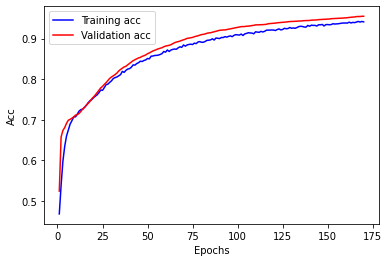

In [474]:
#Plotting the model results
import matplotlib.pyplot as plt
plt.clf()
plt.plot(epochs,r_acc_arr,'b',label='Training acc')
plt.plot(epochs,r_val_acc_arr,'r',label="Validation acc")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

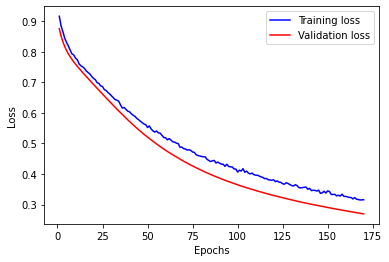

In [475]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(epochs,r_loss_arr,'b',label='Training loss')
plt.plot(epochs,r_val_loss_arr,'r',label="Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [476]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [477]:
y_train_predicted= rmodel.predict(x_train_no_uid)

In [478]:
y_train_predicted

array([[0.17824268],
       [0.88165843],
       [0.03367676],
       ...,
       [0.03336051],
       [0.03584284],
       [0.96443784]], dtype=float32)

In [479]:
np.mean(y_train_predicted)

0.33999938

In [480]:
y_train_predicted_10= np.where(y_train_predicted > 0.34, 1, 0)  #Converting continuous values to binary using threshold technique

In [481]:
y_train_predicted_10

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [482]:
y_train

Patient-Uid
a0f0cef6-1c7c-11ec-a7c7-16262ee38c7f    1
a0eb8fe0-1c7c-11ec-b987-16262ee38c7f    1
a0e8f01e-1c7c-11ec-98e9-16262ee38c7f    0
a0e94d71-1c7c-11ec-ac8d-16262ee38c7f    0
a0e4d360-1c7c-11ec-a202-16262ee38c7f    0
                                       ..
a0ecab05-1c7c-11ec-9c86-16262ee38c7f    1
a0e099d9-1c7c-11ec-8d73-16262ee38c7f    0
a0dd391c-1c7c-11ec-9a5c-16262ee38c7f    0
a0e863dd-1c7c-11ec-9ea2-16262ee38c7f    0
a0ee53b2-1c7c-11ec-914e-16262ee38c7f    1
Name: TARGET DRUG 1/0, Length: 27033, dtype: int64

In [483]:
matrix = confusion_matrix(y_train,y_train_predicted_10)

In [484]:
matrix

array([[17391,   268],
       [  697,  8677]])

In [486]:
x_test_no_uid

,Date,PRIMARY_DIAGNOSIS,SYMPTOM_TYPE_0,SYMPTOM_TYPE_1,SYMPTOM_TYPE_2,SYMPTOM_TYPE_3,SYMPTOM_TYPE_4,SYMPTOM_TYPE_5,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,SYMPTOM_TYPE_10,SYMPTOM_TYPE_11,SYMPTOM_TYPE_12,SYMPTOM_TYPE_13,SYMPTOM_TYPE_14,SYMPTOM_TYPE_15,SYMPTOM_TYPE_16,SYMPTOM_TYPE_17,SYMPTOM_TYPE_18,SYMPTOM_TYPE_19,SYMPTOM_TYPE_20,SYMPTOM_TYPE_21,SYMPTOM_TYPE_22,SYMPTOM_TYPE_23,SYMPTOM_TYPE_24,SYMPTOM_TYPE_25,SYMPTOM_TYPE_26,SYMPTOM_TYPE_27,SYMPTOM_TYPE_28,SYMPTOM_TYPE_29,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,not_target_drugs_total
Patient-Uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,-0.303622,0.177681,0.127056,-0.272902,-0.228281,-0.057944,-0.142901,-0.036779,0.843363,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.112655,-0.093339,-0.062246,-0.087451,-0.095659,-0.138644,-0.075248,-0.053059,-0.029106,-0.040547,-0.035643,-0.037741,-0.024155,-0.015241,-0.036996,-0.023615,-0.009332,-0.131533,0.417203,-0.469073,-0.356583,-0.174634,-0.068257,-0.056363,-0.977411
a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,0.370039,0.079877,-0.387349,-0.272902,-0.228281,-0.057944,-0.142901,-0.036779,0.420687,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.112655,-0.093339,-0.062246,-0.087451,-0.095659,-0.138644,-0.075248,-0.053059,-0.029106,-0.040547,-0.035643,-0.037741,-0.024155,-0.015241,-0.036996,-0.023615,-0.009332,-0.131533,-0.378334,-0.469073,-0.356583,0.565546,-0.068257,-0.056363,1.287064
a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,0.361346,-0.262435,-0.387349,-0.272902,-0.228281,0.629358,-0.142901,-0.036779,-0.424663,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.112655,-0.093339,-0.062246,-0.087451,-0.095659,-0.138644,-0.075248,-0.053059,-0.029106,-0.040547,-0.035643,-0.037741,-0.024155,-0.015241,-0.036996,-0.023615,-0.009332,-0.131533,-0.378334,-0.154788,-0.356583,-0.174634,-0.068257,-0.056363,0.402097
a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,1.021968,-0.409141,-0.387349,-0.272902,-0.228281,-0.057944,-0.142901,-0.036779,-0.424663,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.112655,-0.093339,-0.062246,-0.087451,-0.095659,-0.138644,-0.075248,-0.053059,-0.029106,-0.040547,-0.035643,-0.037741,-0.024155,-0.015241,-0.036996,-0.023615,-0.009332,-0.131533,0.019435,-0.469073,-0.356583,-0.174634,-0.068257,-0.056363,1.182950
a0f9eab1-1c7c-11ec-a732-16262ee38c7f,0.443924,0.079877,-0.387349,-0.272902,-0.228281,0.629358,-0.142901,-0.036779,-0.424663,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.112655,-0.093339,-0.062246,-0.087451,-0.095659,-0.138644,-0.075248,-0.053059,-0.029106,-0.040547,-0.035643,-0.037741,-0.024155,-0.015241,-0.036996,-0.023615,-0.009332,-0.131533,-0.378334,-0.469073,-0.356583,-0.174634,-0.068257,-0.056363,-0.378757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a102720c-1c7c-11ec-bd9a-16262ee38c7f,1.035006,-0.555846,-0.387349,-0.272902,-0.228281,-0.057944,-0.142901,-0.036779,-0.424663,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.112655,-0.093339,-0.062246,-0.087451,-0.095659,-0.138644,-0.075248,-0.053059,-0.029106,-0.040547,-0.035643,-0.037741,-0.024155,-0.015241,-0.036996,-0.023615,-0.009332,-0.131533,-0.378334,-0.469073,-0.356583,-0.174634,-0.068257,-0.056363,-0.430814
a102723c-1c7c-11ec-9f80-16262ee38c7f,-0.103697,-0.555846,-0.387349,-0.272902,-0.228281,-0.057944,-0.142901,-0.036779,-0.424663,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.112655,-0.093339,-0.062246,-0.087451,-0.095659,-0.138644,-0.075248,-0.053059,-0.029106,-0.040547,-0.035643,-0.037741,-0.024155,-0.015241,-0.036996,-0.023615,-0.009332,-0.131533,-0.378334,-0.469073,-0.356583,-0.174634,-0.068257,-0.056363,-0.951383
a102726b-1c7c-11ec-bfbf-16262ee38c7f,0.678618,-0.555846,-0.387349,-0.272902,-0.228281,-0.057944,-0.142901,-0.036779,-0.424663,-0.294039,-0.210914,-0.237439,-0.195197,-0.152681,-0.112655,-0.093339,-0.062246,-0.087451,-0.095659,-0.1

In [487]:
x_test_no_uid.shape

(11482, 39)

In [488]:
x_train_no_uid.shape

(27033, 40)

In [489]:
x_train_no_uid.columns

Index(['Date', 'PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'SYMPTOM_TYPE_1',
       'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_4', 'SYMPTOM_TYPE_5',
       'SYMPTOM_TYPE_6', 'SYMPTOM_TYPE_7', 'SYMPTOM_TYPE_8', 'SYMPTOM_TYPE_9',
       'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_11', 'SYMPTOM_TYPE_12',
       'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_15',
       'SYMPTOM_TYPE_16', 'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
       'SYMPTOM_TYPE_22', 'SYMPTOM_TYPE_23', 'SYMPTOM_TYPE_24',
       'SYMPTOM_TYPE_25', 'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_27',
       'SYMPTOM_TYPE_28', 'SYMPTOM_TYPE_29', 'TARGET DRUG', 'TEST_TYPE_0',
       'TEST_TYPE_1', 'TEST_TYPE_2', 'TEST_TYPE_3', 'TEST_TYPE_4',
       'TEST_TYPE_5', 'not_target_drugs_total'],
      dtype='object')

In [493]:
import numpy as np
np.random.seed(42)
x_test_no_uid['TARGET DRUG HISTORY']=0

In [495]:
x_test_no_uid.shape

(11482, 40)

In [497]:
x_test_no_uid.columns

Index(['Date', 'PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'SYMPTOM_TYPE_1',
       'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_4', 'SYMPTOM_TYPE_5',
       'SYMPTOM_TYPE_6', 'SYMPTOM_TYPE_7', 'SYMPTOM_TYPE_8', 'SYMPTOM_TYPE_9',
       'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_11', 'SYMPTOM_TYPE_12',
       'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_15',
       'SYMPTOM_TYPE_16', 'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
       'SYMPTOM_TYPE_22', 'SYMPTOM_TYPE_23', 'SYMPTOM_TYPE_24',
       'SYMPTOM_TYPE_25', 'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_27',
       'SYMPTOM_TYPE_28', 'SYMPTOM_TYPE_29', 'TEST_TYPE_0', 'TEST_TYPE_1',
       'TEST_TYPE_2', 'TEST_TYPE_3', 'TEST_TYPE_4', 'TEST_TYPE_5',
       'not_target_drugs_total', 'TARGET DRUG HISTORY'],
      dtype='object')

In [498]:
x_test_no_uid.dtypes

Date                      float64
PRIMARY_DIAGNOSIS         float64
SYMPTOM_TYPE_0            float64
SYMPTOM_TYPE_1            float64
SYMPTOM_TYPE_2            float64
SYMPTOM_TYPE_3            float64
SYMPTOM_TYPE_4            float64
SYMPTOM_TYPE_5            float64
SYMPTOM_TYPE_6            float64
SYMPTOM_TYPE_7            float64
SYMPTOM_TYPE_8            float64
SYMPTOM_TYPE_9            float64
SYMPTOM_TYPE_10           float64
SYMPTOM_TYPE_11           float64
SYMPTOM_TYPE_12           float64
SYMPTOM_TYPE_13           float64
SYMPTOM_TYPE_14           float64
SYMPTOM_TYPE_15           float64
SYMPTOM_TYPE_16           float64
SYMPTOM_TYPE_17           float64
SYMPTOM_TYPE_18           float64
SYMPTOM_TYPE_19           float64
SYMPTOM_TYPE_20           float64
SYMPTOM_TYPE_21           float64
SYMPTOM_TYPE_22           float64
SYMPTOM_TYPE_23           float64
SYMPTOM_TYPE_24           float64
SYMPTOM_TYPE_25           float64
SYMPTOM_TYPE_26           float64
SYMPTOM_TYPE_2

In [499]:
y_test= rmodel.predict(x_test_no_uid)

In [500]:
type(y_test)

numpy.ndarray

In [501]:
sub_pd= pd.DataFrame(test_pd['Patient-Uid'])

In [502]:
sub_pd

,Patient-Uid
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f
...,...
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f


In [503]:
y_test

array([[0.9830556 ],
       [0.09737367],
       [0.08673218],
       ...,
       [0.07369865],
       [0.13121314],
       [0.05449069]], dtype=float32)

In [504]:
y_test_uid=pd.DataFrame(x_test_no_uid.index.values)

In [505]:
y_test_uid['TARGET DRUG']=y_test

In [506]:
y_test_uid

,0,TARGET DRUG
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,0.983056
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,0.097374
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,0.086732
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,0.616180
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,0.208748
...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,0.191186
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,0.185542
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,0.073699
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,0.131213


In [507]:
np.mean(y_test_uid['TARGET DRUG'])

0.40292224287986755

In [508]:
y_test_uid['TARGET DRUG 10']= np.where(y_test_uid['TARGET DRUG'] > 0.397, 1, 0)

In [509]:
y_test_uid['Patient-Uid']=y_test_uid[0]

In [510]:
y_test_uid.columns

Index([0, 'TARGET DRUG', 'TARGET DRUG 10', 'Patient-Uid'], dtype='object')

In [511]:
y_test_uid.drop(0,axis=1,inplace=True)

In [512]:
y_test_uid.drop('TARGET DRUG',axis=1,inplace=True)

In [513]:
y_test_uid

,TARGET DRUG 10,Patient-Uid
0,1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f
1,0,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f
2,0,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f
3,1,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f
4,0,a0f9eab1-1c7c-11ec-a732-16262ee38c7f
...,...,...
11477,0,a102720c-1c7c-11ec-bd9a-16262ee38c7f
11478,0,a102723c-1c7c-11ec-9f80-16262ee38c7f
11479,0,a102726b-1c7c-11ec-bfbf-16262ee38c7f
11480,0,a102729b-1c7c-11ec-86ba-16262ee38c7f


In [514]:
sub_pd

,Patient-Uid
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f
...,...
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f


In [515]:
#left merge using Patient-Uid column
sub_pd_1= sub_pd.merge(y_test_uid,on="Patient-Uid",how="left")

In [516]:
sub_pd_1

,Patient-Uid,TARGET DRUG 10
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1
...,...,...
1065519,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,0
1065520,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,0
1065521,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,0
1065522,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,0


In [517]:
sub_pd_1['TARGET DRUG 10'].value_counts()

0    619081
1    446443
Name: TARGET DRUG 10, dtype: int64

In [518]:
sub_pd_1['label']=sub_pd_1['TARGET DRUG 10']

In [519]:
sub_pd_1.drop('TARGET DRUG 10',axis=1,inplace=True)

In [520]:
sub_pd_1.dtypes

Patient-Uid    object
label           int64
dtype: object

In [524]:
sub_pd_1.to_csv('final_submission.csv')  #downloading the final dataframe as csv